# 🕵️‍♂️ Detecção de Overfitting

O overfitting ocorre quando um **modelo se ajusta excessivamente aos dados de treinamento**, capturando ruídos e padrões idiossincráticos, resultando em uma **performance inferior em dados novos**. 

Quando o **modelo é muito complexo** em relação à quantidade de dados disponíveis, quando há **demasiadas variáveis irrelevantes** ou quando o **modelo é treinado por um número excessivo de iterações**, são algumas das situações onde podemos observar o overfitting.

---

Para evitar isso, os cientistas de dados aplicam técnicas como:
- 🔒 **Regularização**
- 🔁 **Validação cruzada**
- ✂️ **Simplificação do modelo**

Tudo isso buscando equilibrar a **complexidade do modelo** com sua **capacidade de generalização**.

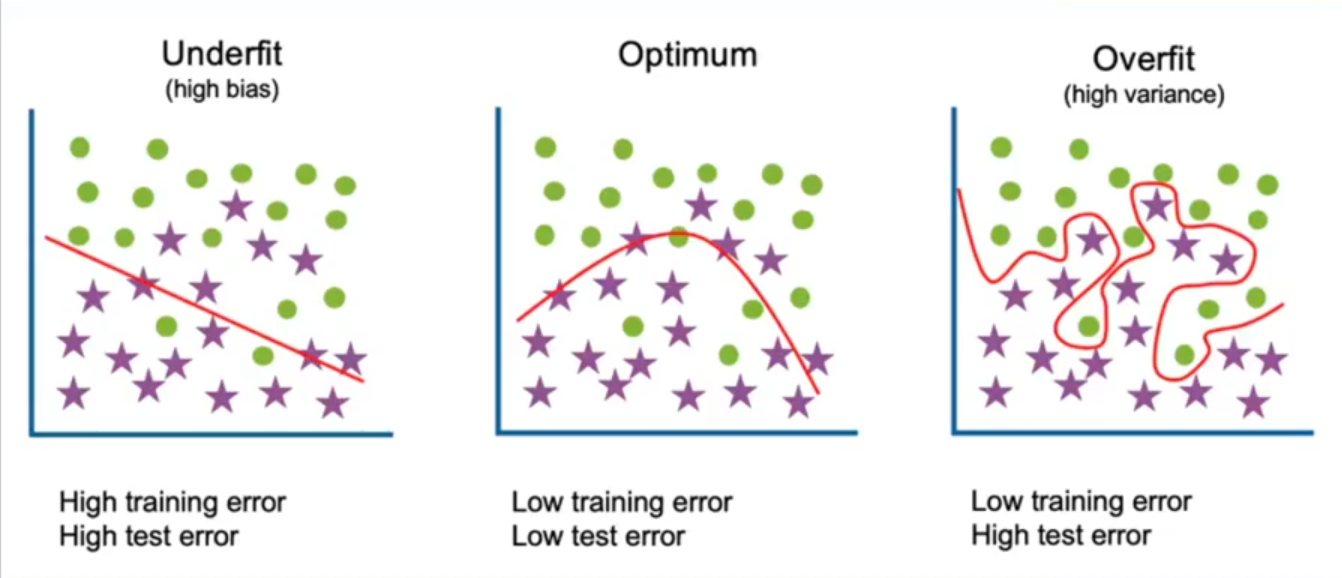

# 🤝 KNN

O algoritmo **K–Nearest Neighbors (KNN)** é um método simples e amplamente utilizado para **classificação e regressão**. 

Na sua essência, o KNN opera com base na ideia de que **instâncias de dados semelhantes estão próximas umas das outras** no espaço de características.

Quando um novo ponto de dados é introduzido e precisa ser classificado ou ter um valor previsto, o algoritmo KNN identifica os **'k' pontos de dados mais próximos** desse novo ponto no conjunto de dados de treinamento, onde **'k' é um parâmetro** especificado pelo cientista de dados.

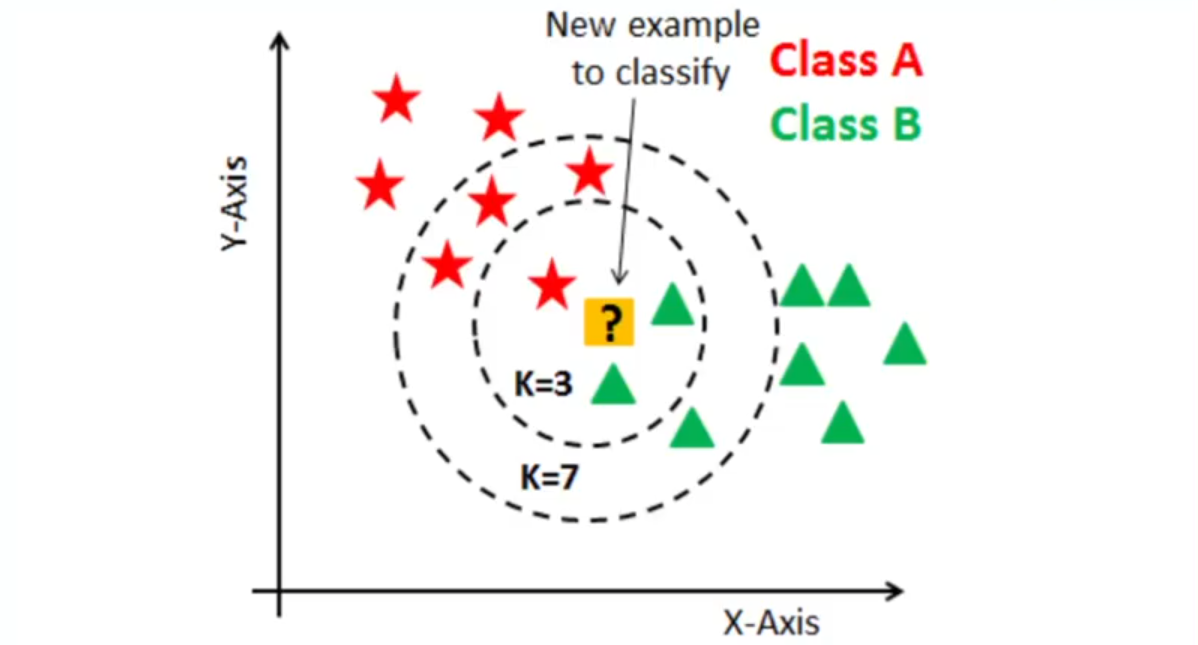

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, learning_curve, LearningCurveDisplay
from sklearn.metrics import mean_squared_error, f1_score

from numpy import linspace, mean
import plotly.express as px

### Carregar e visualizar os dados - Regressão

In [2]:
# carregar os dados - regressao
df = pd.read_csv('./datasets/dataset_colesterol.csv')

In [13]:
# visualizar estrutura dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Idade                        991 non-null    float64
 1   Peso                         991 non-null    float64
 2   Altura                       991 non-null    float64
 3   Colesterol                   991 non-null    float64
 4   Grupo Sanguíneo_A            991 non-null    bool   
 5   Grupo Sanguíneo_AB           991 non-null    bool   
 6   Grupo Sanguíneo_B            991 non-null    bool   
 7   Grupo Sanguíneo_O            991 non-null    bool   
 8   Fumante_Não                  991 non-null    bool   
 9   Fumante_Sim                  991 non-null    bool   
 10  Nível de Atividade_Alto      991 non-null    bool   
 11  Nível de Atividade_Baixo     991 non-null    bool   
 12  Nível de Atividade_Moderado  991 non-null    bool   
dtypes: bool(9), float64(4)
me

In [7]:
# visualizar dataframe
df.head(10)

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33.0,85.1,186.0,199.63,False,False,True,False,False,True,False,True,False
1,68.0,105.0,184.0,236.98,True,False,False,False,True,False,False,False,True
2,25.0,64.8,180.0,161.79,False,False,False,True,True,False,True,False,False
3,43.0,120.2,167.0,336.24,True,False,False,False,True,False,True,False,False
4,79.0,88.5,175.0,226.23,False,True,False,False,True,False,False,True,False
5,68.0,66.8,170.0,185.31,False,False,True,False,True,False,False,True,False
6,60.0,117.3,181.0,289.33,True,False,False,False,False,True,False,True,False
7,35.0,86.9,174.0,216.48,False,False,False,True,False,True,False,False,True
8,62.0,81.3,166.0,235.30,False,False,False,True,True,False,False,True,False
9,44.0,32.7,165.0,97.79,False,False,True,False,False,True,True,False,False


In [6]:
# ajustar dataframe
df.drop('Id', axis=1, inplace=True)

# aplicar onehotencoding nas variaveis categoricas
df = pd.get_dummies(df, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'])

In [11]:
df = df.dropna()

In [12]:
# dataframe atualizado
df

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33.0,85.1,186.0,199.63,False,False,True,False,False,True,False,True,False
1,68.0,105.0,184.0,236.98,True,False,False,False,True,False,False,False,True
2,25.0,64.8,180.0,161.79,False,False,False,True,True,False,True,False,False
3,43.0,120.2,167.0,336.24,True,False,False,False,True,False,True,False,False
4,79.0,88.5,175.0,226.23,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31.0,68.1,166.0,206.81,False,True,False,False,False,True,False,False,True
996,51.0,47.7,170.0,128.03,False,False,False,True,True,False,True,False,False
997,39.0,85.5,176.0,211.14,False,True,False,False,True,False,False,True,False
998,61.0,91.2,161.0,284.53,False,True,False,False,False,True,False,True,False


### Treinar Modelo de Regressão Linear, visualisando a curva de aprendizado

In [14]:
# Separar X e y
X = df.drop('Colesterol', axis=1)
y = df['Colesterol']

In [15]:
# Criar o modelo
model_reg = LinearRegression()

In [16]:
# gerar scores da curva de aprendizado - regressao
train_size_abs, train_scores, test_scores = learning_curve(model_reg, X, y, train_sizes=linspace(0.1, 0.9, 9), scoring='neg_mean_squared_error', cv=3)

In [17]:
# train scores
train_scores

array([[-47.57998382, -74.79056872, -74.79056872],
       [-55.04439891, -87.59992713, -87.59992713],
       [-61.24552014, -81.8726011 , -81.8726011 ],
       [-66.4367868 , -80.98836172, -80.98836172],
       [-65.43118988, -82.9875672 , -82.9875672 ],
       [-63.40671762, -77.67858806, -79.16844341],
       [-65.52636244, -77.69226197, -77.03563388],
       [-66.53874775, -76.73647653, -76.90516017],
       [-70.2325174 , -79.23701019, -77.21235087]])

In [18]:
# quantidade
train_size_abs

array([ 66, 132, 198, 264, 330, 396, 462, 528, 594])

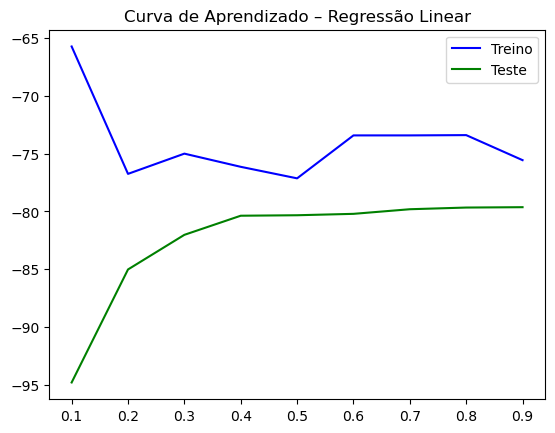

In [20]:
# Gerar Plot com Curva de Aprendizado
plt.plot(linspace(0.1, 0.9, 9), mean(train_scores, axis=1), color='b', label='Treino')
plt.plot(linspace(0.1, 0.9, 9), mean(test_scores, axis=1), color='g', label='Teste')
plt.title('Curva de Aprendizado – Regressão Linear')
plt.legend()
plt.show()

### Carregar e preparar dados - Classificação

In [21]:
# Carregar o dataset
df2 = pd.read_csv('./datasets/fruit_quality.csv')

In [22]:
# Visualizar estrutura
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [23]:
# visualizar df
df.head(10)

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33.0,85.1,186.0,199.63,False,False,True,False,False,True,False,True,False
1,68.0,105.0,184.0,236.98,True,False,False,False,True,False,False,False,True
2,25.0,64.8,180.0,161.79,False,False,False,True,True,False,True,False,False
3,43.0,120.2,167.0,336.24,True,False,False,False,True,False,True,False,False
4,79.0,88.5,175.0,226.23,False,True,False,False,True,False,False,True,False
5,68.0,66.8,170.0,185.31,False,False,True,False,True,False,False,True,False
6,60.0,117.3,181.0,289.33,True,False,False,False,False,True,False,True,False
7,35.0,86.9,174.0,216.48,False,False,False,True,False,True,False,False,True
8,62.0,81.3,166.0,235.30,False,False,False,True,True,False,False,True,False
9,44.0,32.7,165.0,97.79,False,False,True,False,False,True,True,False,False


In [24]:
# Ajustar Dataframe

# Remover a coluna 'A_id'
df2.drop('A_id', axis=1, inplace=True)

# Transformar a coluna 'Quality' em 0 ou 1 (binária)
df2['Quality'] = (df2['Quality'] == 'good').astype(int)

# Visualizar resultado
df2


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


### Treinar modelo de KNN com mudança de K

In [25]:
# separar o X e y
X = df2.drop('Quality', axis=1)
y = df2['Quality']

In [26]:
# separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [28]:
# fazer um loop para treinar o modelo com diversas quantidades de vizinhos
scores_train = []
scores_test = []

for i in range(1, 20, 2):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    scores_train.append(f1_score(y_train, y_train_pred))
    scores_test.append(f1_score(y_test, y_test_pred))
    print(f'{i}: F1_Train: {f1_score(y_train, y_train_pred)} F1_Test: {f1_score(y_test, y_test_pred)}')


1: F1_Train: 1.0 F1_Test: 0.8740617180984154
3: F1_Train: 0.9452103216684341 F1_Test: 0.8964941569282137
5: F1_Train: 0.9262266148958701 F1_Test: 0.8985985160758451
7: F1_Train: 0.921935711762628 F1_Test: 0.8929460580912864
9: F1_Train: 0.9186704384724187 F1_Test: 0.8913043478260869
11: F1_Train: 0.9178130511463845 F1_Test: 0.8887029288702929
13: F1_Train: 0.9115983026874116 F1_Test: 0.8881469115191987
15: F1_Train: 0.9133969600565571 F1_Test: 0.890728476821192
17: F1_Train: 0.9099258212645708 F1_Test: 0.8883333333333333
19: F1_Train: 0.9115885875308207 F1_Test: 0.885


In [29]:
scores_test

[0.8740617180984154,
 0.8964941569282137,
 0.8985985160758451,
 0.8929460580912864,
 0.8913043478260869,
 0.8887029288702929,
 0.8881469115191987,
 0.890728476821192,
 0.8883333333333333,
 0.885]

In [30]:
# criar um dataframe com os scores
df_results = pd.DataFrame({'k': range(1, 20, 2), 'train': scores_train, 'test': scores_test})

In [31]:
df_results

,k,train,test
0,1,1.000000,0.874062
1,3,0.945210,0.896494
2,5,0.926227,0.898599
3,7,0.921936,0.892946
4,9,0.918670,0.891304
5,11,0.917813,0.888703
6,13,0.911598,0.888147
7,15,0.913397,0.890728
8,17,0.909926,0.888333
9,19,0.911589,0.885000


In [34]:
# Mostrar Plot com Scores
xaxis = x = [i for i in range(1, 20, 2)]
fig = px.line(df_results, x='k', y=['train', 'test'], title='KNN Performance – Mudando K')
fig.update_xaxes(tickvals=xaxis, ticktext=[str(i) for i in x])
fig.show()